In [2]:
# Loading and parsing data

# PLOT - parse data + std-dev
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid")

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data_path = os.path.join(os.path.pardir, 'data', 'state')
sizes = [10, 1024, 102400, 1048576, 5242880]

# read praas data
#for size in sizes:
data = pd.read_csv(os.path.join(data_path, 'state_s3_fargate.csv'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
data['time'] /= 1000.0 * 1000.0
data['type'] = 's3'
data.drop(['repetition'], axis=1, inplace=True)

praas_data = pd.read_csv(os.path.join(data_path, 'state_put_fargate.csv'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
praas_data['time'] /= 1000.0 * 1000.0
praas_data['type'] = 'put_get'
praas_data.drop(['repetition'], axis=1, inplace=True)

redis_data = pd.read_csv(os.path.join(data_path, 'redis_fargate.csv'), sep=',| ')
#print(data)
#data.set_index('id', drop=True, inplace=True)
redis_data['time'] /= 1000.0 * 1000.0
redis_data['type'] = 'redis'
redis_data.drop(['repetition'], axis=1, inplace=True)

                   
#data_praas = pd.concat([redis_data, data], axis=0)
#print(data_praas)

/home/mcopik/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_246711/2173786848.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_246711/2173786848.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(os.path.join(data_path, 'state_s3_fargate.csv'), sep=',| ')
/tmp/ipykernel_246711/2173786848.py:32

In [4]:
print(data.groupby(['size', 'msg']).count().unstack())
print(redis_data.groupby(['size', 'msg']).count().unstack())
print(praas_data.groupby(['size', 'msg']).count().unstack())

       time                     type                    
msg     1    10   25   50   100  1    10   25   50   100
size                                                    
10      100  100  100  100  100  100  100  100  100  100
100     100  100  100  100  100  100  100  100  100  100
1000    100  100  100  100  100  100  100  100  100  100
10000   100  100  100  100  100  100  100  100  100  100
100000  100  100  100  100  100  100  100  100  100  100
       time                     type                    
msg     1    10   25   50   100  1    10   25   50   100
size                                                    
10      100  100  100  100  100  100  100  100  100  100
100     100  100  100  100  100  100  100  100  100  100
1000    100  100  100  100  100  100  100  100  100  100
10000   100  100  100  100  100  100  100  100  100  100
100000  100  100  100  100  100  100  100  100  100  100
       time                     type                    
msg     1    10   25   50   100

In [7]:
#print(data)
result_s3 = data.groupby(['size', 'msg']).median().unstack()
result_redis = redis_data.groupby(['size', 'msg']).median().unstack()
result_praas = praas_data.groupby(['size', 'msg']).median().unstack()
print(result_praas)
print(result_redis)

s3_diff = result_s3/result_praas
redis_diff = result_redis/result_praas

s3_diff.sort_index(level=0, ascending=False, inplace=True)
redis_diff.sort_index(level=0, ascending=False, inplace=True)
print(s3_diff)
print(redis_diff)
#pivot(index='size', columns='msg', values='time')

            time                                                
msg          1          10          25          50           100
size                                                            
10      0.739750   7.493519   18.754019   38.104274    77.166132
100     0.752682   7.602208   18.937491   38.242783    76.632941
1000    0.798943   8.238308   20.972898   41.123804    83.973377
10000   1.164725  11.491499   29.460378   59.250489   118.686684
100000  8.861498  88.660267  268.796920  537.577951  1075.148297
             time                                                 
msg           1           10          25          50           100
size                                                              
10       1.444962   15.424787   39.010581   75.364544   142.897389
100      1.417730   14.226885   35.729883   73.160089   149.597400
1000     1.614360   16.421025   39.814302   80.673525   162.672429
10000    2.481297   24.639859   61.313928  122.866335   245.981486
100000  10.

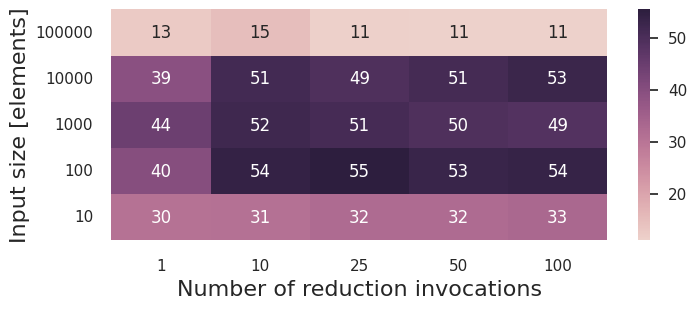

In [8]:

sns.set(rc={'figure.figsize':(8,3)})
ax = plt.gca()


sns.heatmap(s3_diff, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))


ax.set_xticklabels(['1', '10', '25', '50', '100'])
ax.set_xlabel('Number of reduction invocations',fontsize=16)
ax.set_ylabel('Input size [elements]',fontsize=16)
ax.set_title("")


ax.figure.savefig("state_s3.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

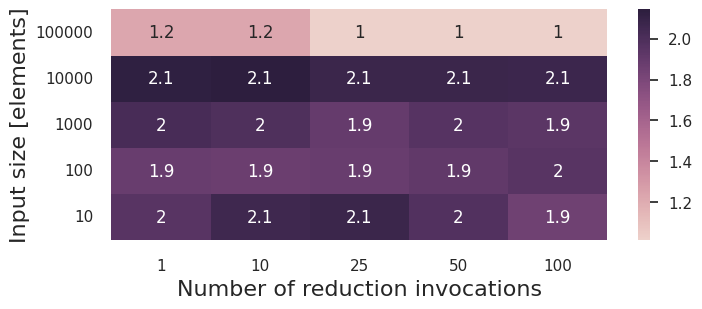

In [9]:

sns.set(rc={'figure.figsize':(8,3)})
ax = plt.gca()

sns.heatmap(redis_diff, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))


ax.set_xticklabels(['1', '10', '25', '50', '100'])
ax.set_xlabel('Number of reduction invocations',fontsize=16)
ax.set_ylabel('Input size [elements]',fontsize=16)
ax.set_title("")


ax.figure.savefig("state_redis.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)